In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'한글'}>

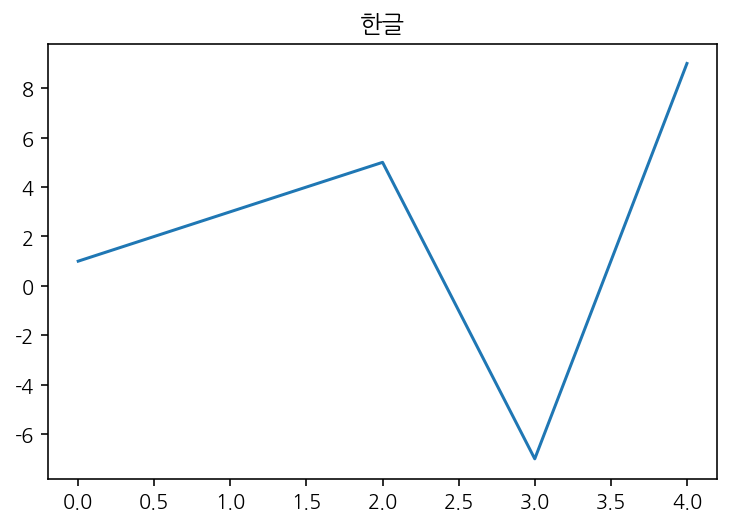

In [3]:
import koreanize_matplotlib
%config InlineBackend.figure_format = "retina" # 글씨 선명하게 출력

pd.Series([1, 3, 5, -7 ,9]).plot(title = "한글")

데이터 전처리

In [65]:
train = pd.read_csv("E:/Kaggle/Data/klue/train_data.csv")
test = pd.read_csv("E:/Kaggle/Data/klue/test_data.csv")
train.shape, test.shape

((45654, 3), (9131, 2))

In [66]:
train

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2


In [68]:
test

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계


In [5]:
topic = pd.read_csv("E:/Kaggle/Data/klue/topic_dict.csv")

In [6]:
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [7]:
topic["topic"].values

array(['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'], dtype=object)

In [8]:
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [9]:
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [10]:
raw = pd.concat([train, test], axis = 0)
raw

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0
...,...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN


In [11]:
raw.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0


In [12]:
raw.tail()

,index,title,topic_idx
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN
9130,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN


In [13]:
df = raw.merge(topic, how = "left")
df

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계
...,...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN


In [14]:
df.head()

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계


In [15]:
df["topic_idx"].value_counts()

4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: topic_idx, dtype: int64

<AxesSubplot:xlabel='topic', ylabel='count'>

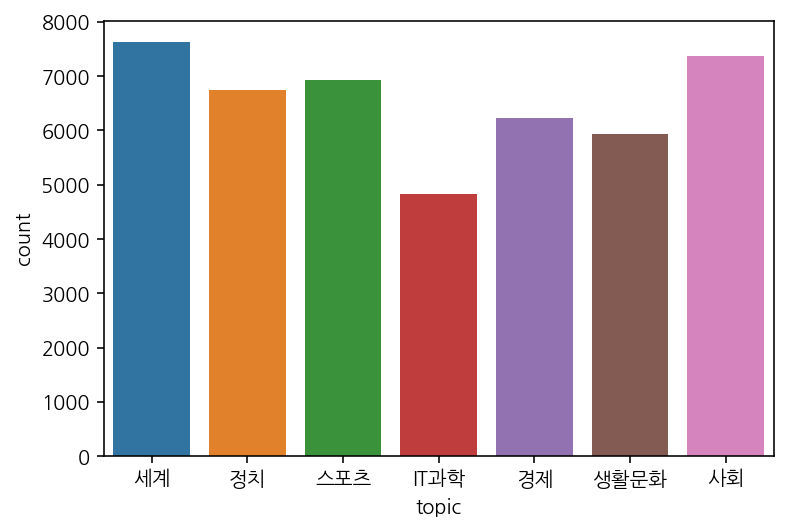

In [16]:
sns.countplot(data = df, x = "topic")

In [17]:
df

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계
...,...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN


In [18]:
df["len"] = df["title"].apply(lambda x : len(x))
df["word_count"] = df["title"].apply(lambda x : len(x.split()))
df["unique_word_count"] = df["title"].apply(lambda x : len(set(x.split())))

In [19]:
df.head()

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7


<AxesSubplot:xlabel='unique_word_count', ylabel='Count'>

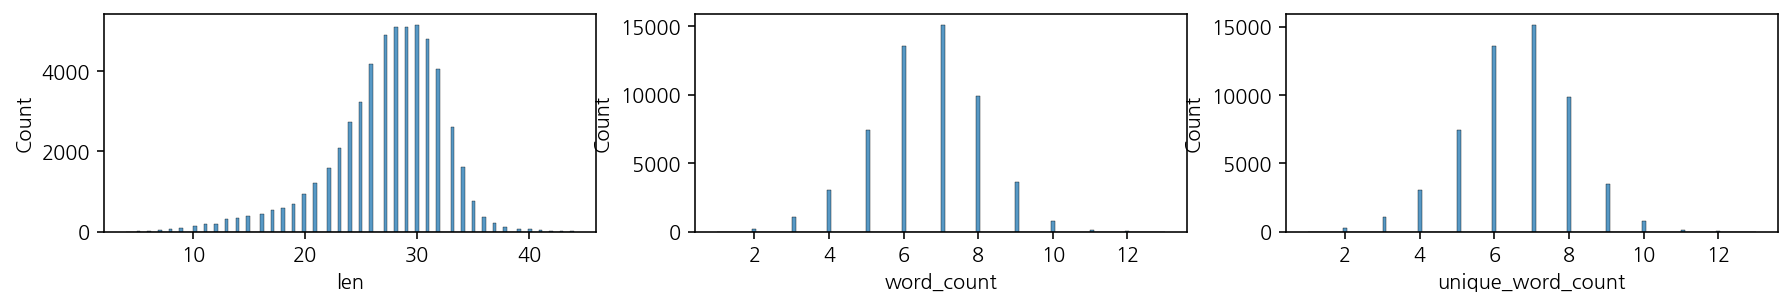

In [20]:
fig, axes = plt.subplots(1, 3, figsize = (15, 2))
sns.histplot(df["len"], ax = axes[0])
sns.histplot(df["word_count"], ax = axes[1])
sns.histplot(df["unique_word_count"], ax = axes[2])

In [21]:
df[["len", "word_count", "unique_word_count"]].describe()

,len,word_count,unique_word_count
count,54785.000000,54785.000000,54785.000000
mean,27.318846,6.587880,6.576198
std,4.947738,1.471852,1.465320
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,44.000000,13.000000,13.000000


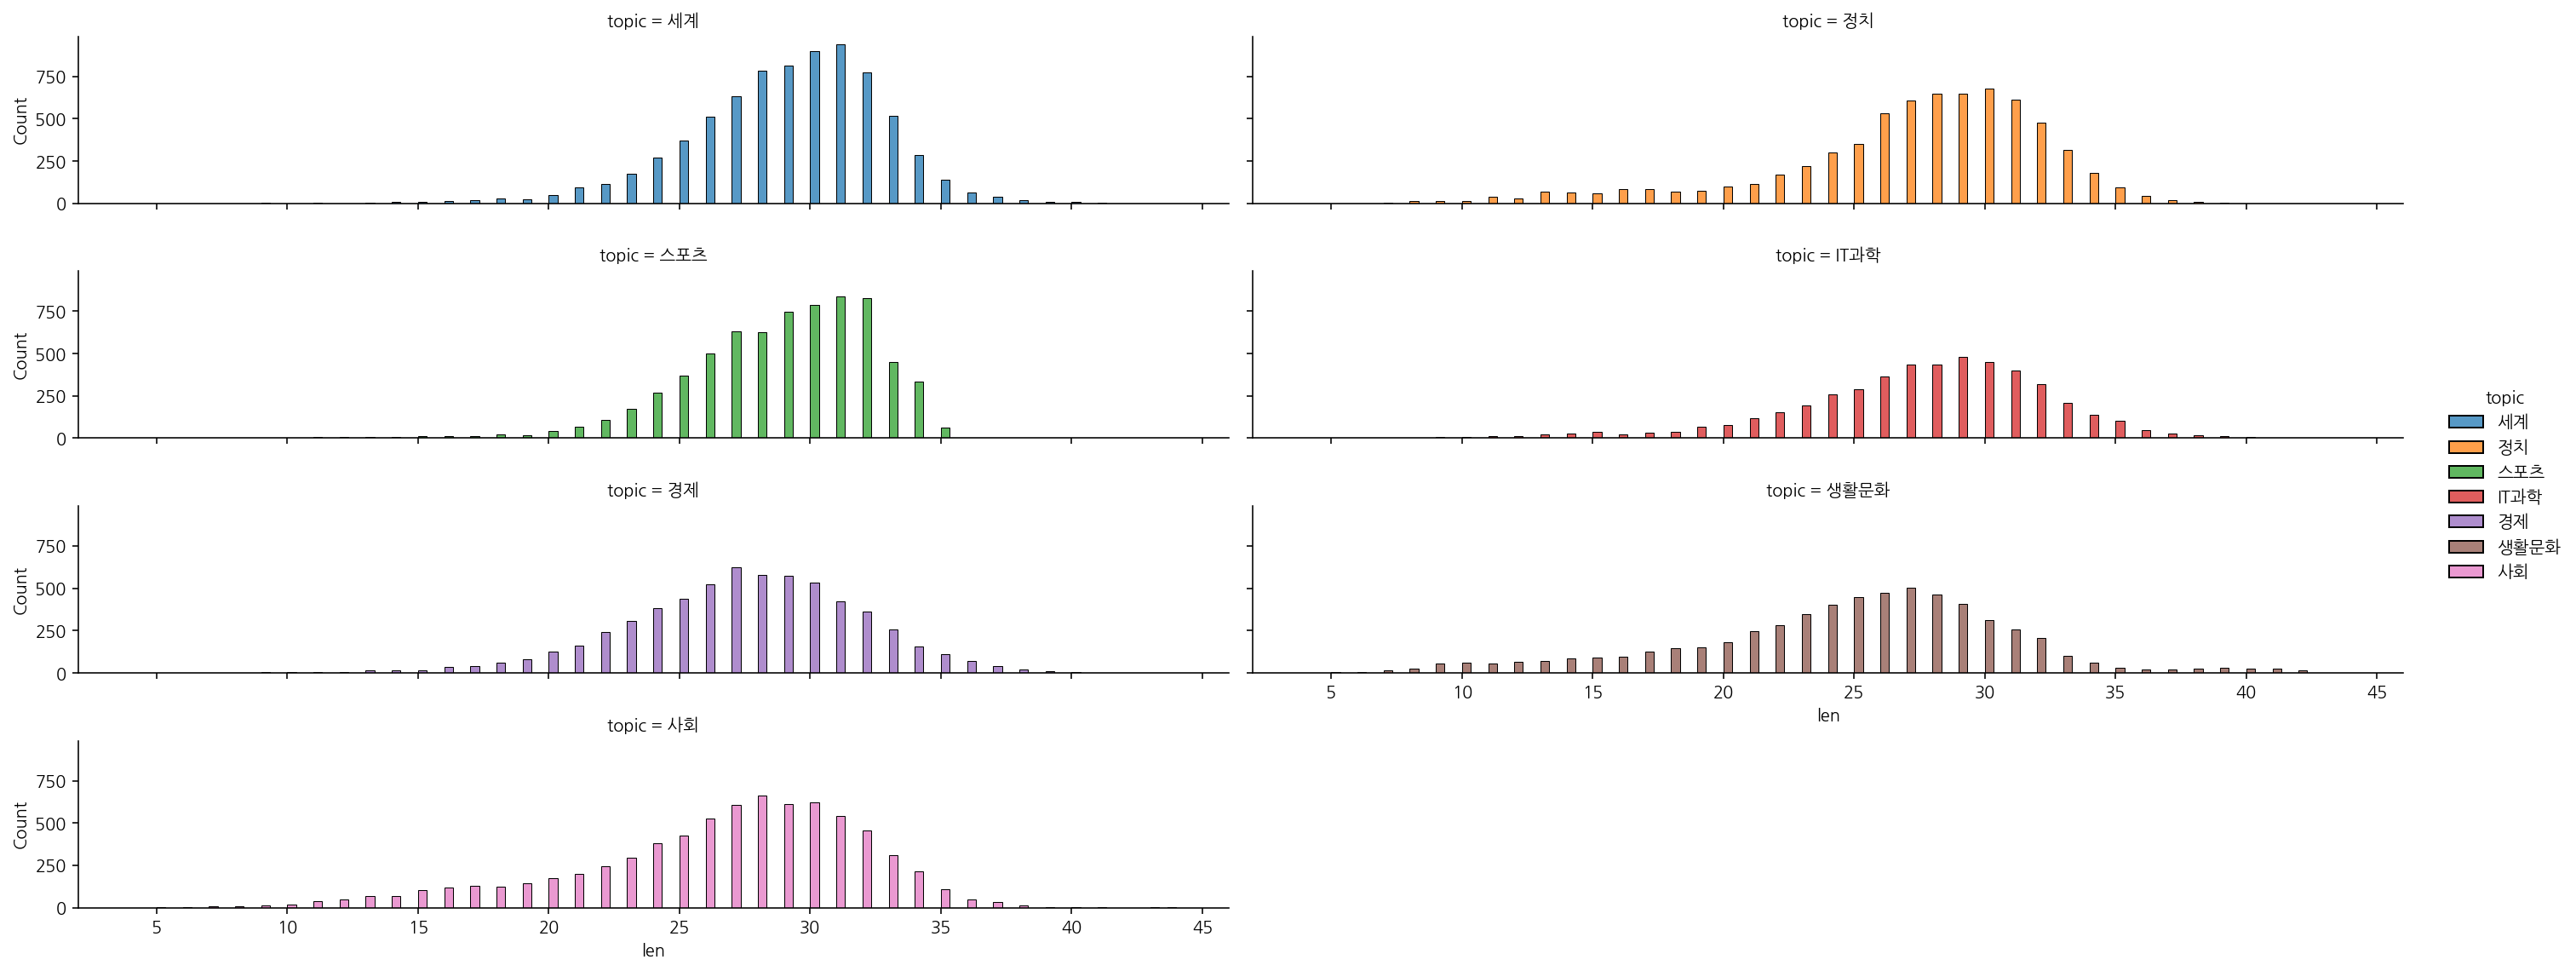

In [22]:
sns.displot(data = df, x = "len", hue = "topic", col = "topic", col_wrap = 2, aspect = 5, height = 2)

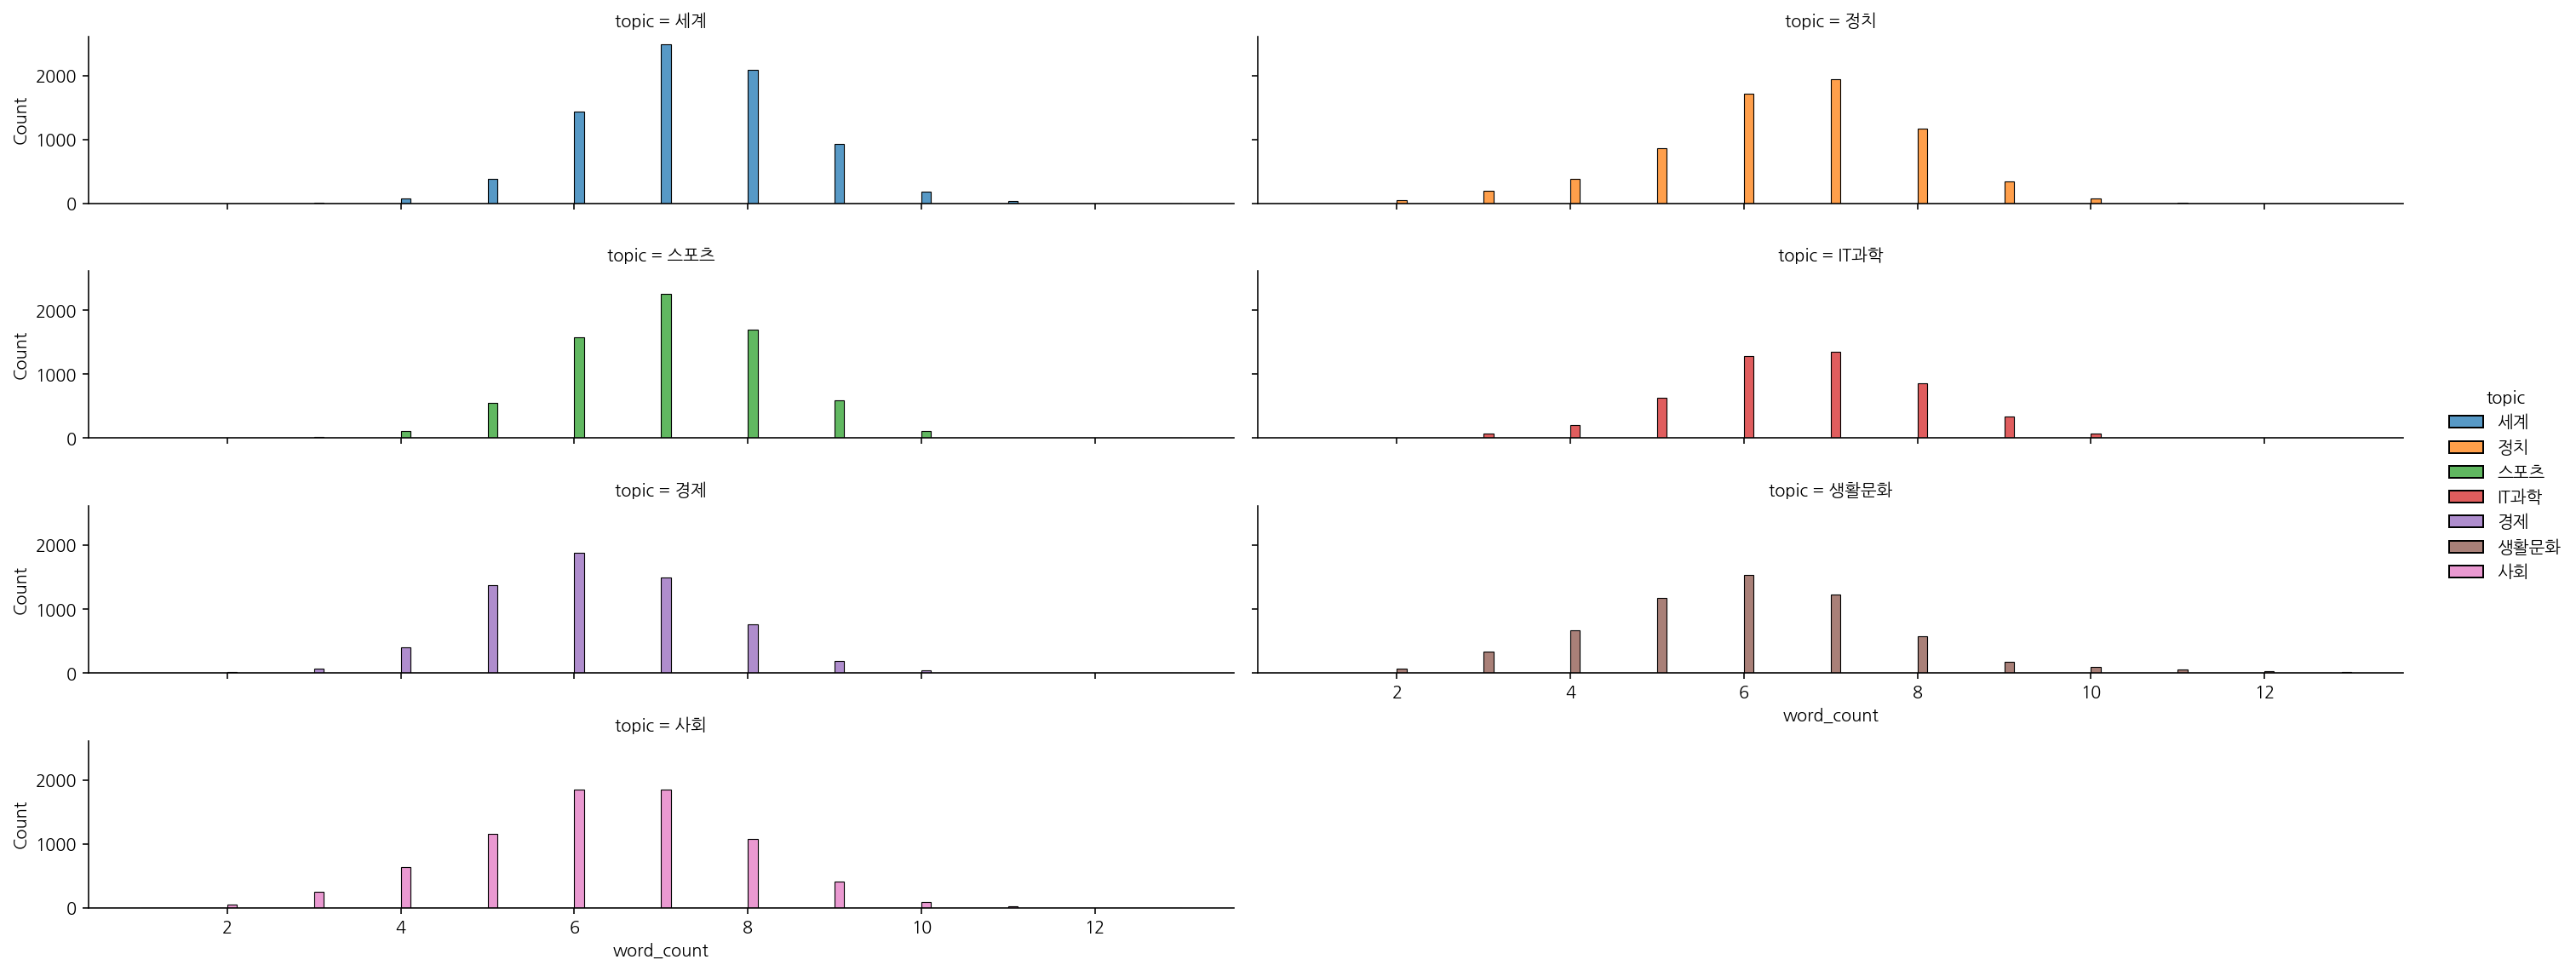

In [23]:
sns.displot(data = df, x = "word_count", hue = "topic", col = "topic", col_wrap = 2, aspect = 5, height = 2)

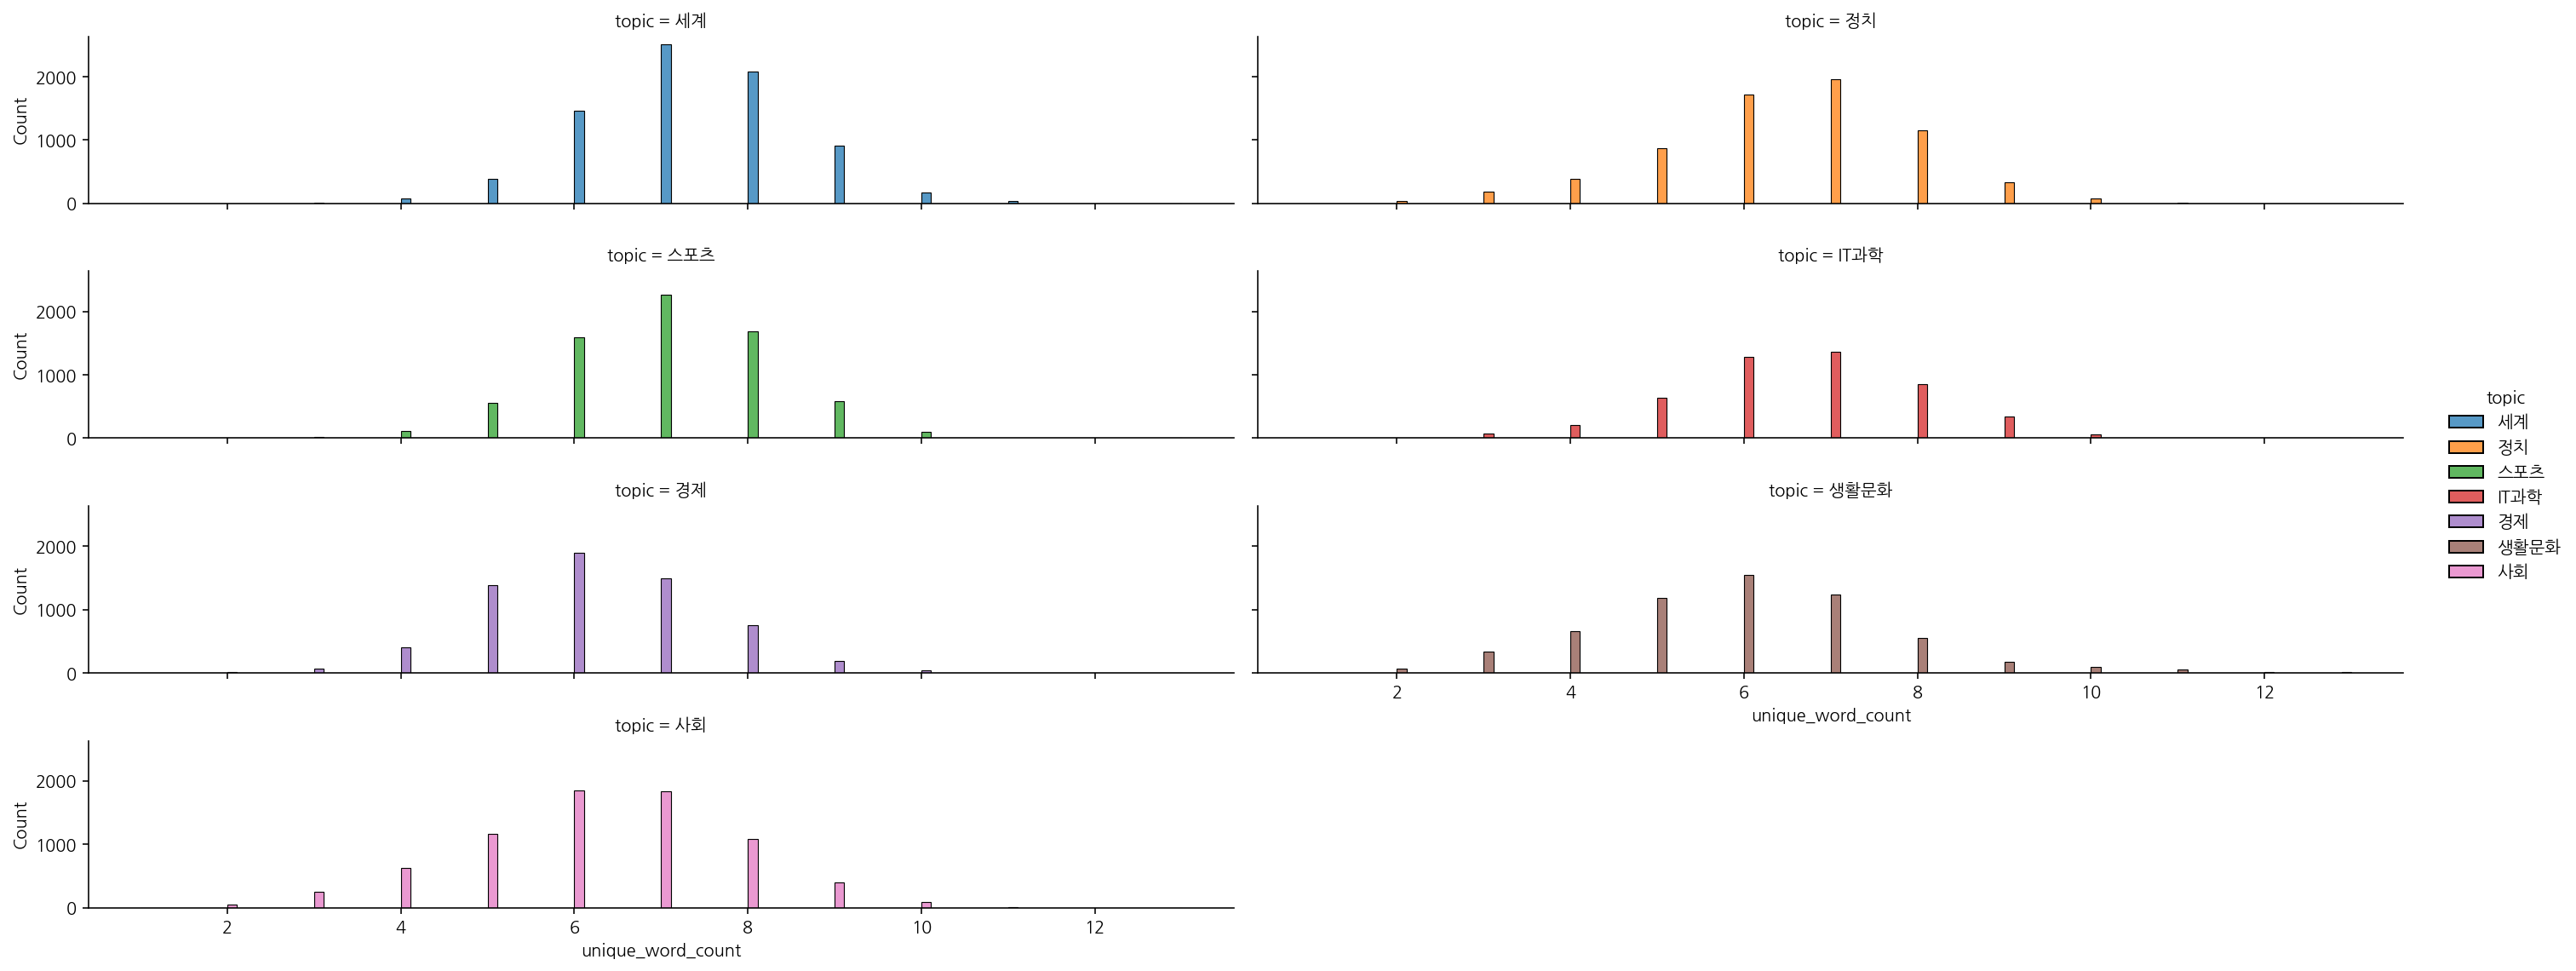

In [24]:
sns.displot(data = df, x = "unique_word_count", hue = "topic", col = "topic", col_wrap = 2, aspect = 5, height = 2)

문자 전처리

In [25]:
import re
df["title"] = df["title"].str.replace("[0-9]", "", regex = True)
df["title"] = df["title"].str.lower()

In [26]:
df

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,nyt 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7
...,...,...,...,...,...,...,...
54780,54780,인천 오후 시분 대설주의보…눈 .cm 쌓여,NaN,NaN,28,6,6
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29,7,7
54782,54782,년 전 부마항쟁 부산 시위 사진 점 최초 공개,NaN,NaN,28,9,9
54783,54783,게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29,6,6


In [28]:
from konlpy.tag import Okt
okt = Okt()

def okt_clean(text) :
    clean_text = []
    # okt.pos : (단어, 품사)로 이루어진 리스트
    for word in okt.pos(text, stem = True) :
        # 조사, 어미, 구두점 제거
        if word[1] not in ["Josa", "Eomi", "Punctuation"] :
            clean_text.append(word[0])
            
    return " ".join(clean_text)
    
from tqdm import tqdm
tqdm.pandas()

# progress_map : 반복 가능한 객체에 대해 진행 상황을 보여주는 프로그레스 바를 생성한다.
train["title"] = train["title"].progress_map(okt_clean)
test["title"] = test["title"].progress_map(okt_clean)

100%|█████████████████████████████████████████████████████████████████████████████| 9131/9131 [00:14<00:00, 650.58it/s]


In [72]:
okt.pos(df["title"][0], stem = True)

[('인천', 'Noun'),
 ('→', 'Foreign'),
 ('핀란드', 'Noun'),
 ('항공기', 'Noun'),
 ('결항', 'Noun'),
 ('…', 'Punctuation'),
 ('휴가', 'Noun'),
 ('철', 'Noun'),
 ('여행객', 'Noun'),
 ('분통', 'Noun')]

In [29]:
def remove_stopwords(text) :
    tokens = text.split(' ')
    stops = ["합니다", "하는", "할", "하고", "한다", "그리고", "입니다", "그", "등", "이런", " 것 ", " 및 ", "제 ", " 더 "]
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [30]:
df["title"] = df["title"].apply(remove_stopwords)

In [31]:
df

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,nyt 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7
...,...,...,...,...,...,...,...
54780,54780,인천 오후 시분 대설주의보…눈 .cm 쌓여,NaN,NaN,28,6,6
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29,7,7
54782,54782,년 전 부마항쟁 부산 시위 사진 점 최초 공개,NaN,NaN,28,9,9
54783,54783,게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29,6,6


학습, 시험데이터 세트 분리

In [32]:
# train과 test 데이터를 병합했었는데, 다시 분리한다.
# train은 topic_idx가 있고, test는 topic_idx가 없다(nan)
label_name = "topic_idx"
train = df[df[label_name].notnull()]
test = df[df[label_name].isnull()]
train

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,nyt 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7
...,...,...,...,...,...,...,...
45649,45649,kb금융 미국 ib 스티펠과 제휴…선진국 시장 공략,1.0,경제,28,7,7
45650,45650,보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2.0,사회,31,7,7
45651,45651,게시판 키움증권 키움 영웅전 실전투자대회,1.0,경제,27,6,6
45652,45652,답변하는 배기동 국립중앙박물관장,2.0,사회,17,3,3


In [33]:
test

,index,title,topic_idx,topic,len,word_count,unique_word_count
45654,45654,유튜브 내달 일까지 크리에이터 지원 공간 운영,NaN,NaN,26,7,7
45655,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,NaN,NaN,23,5,5
45656,45656,내년부터 국가rd 평가 때 논문건수는 반영 않는다,NaN,NaN,27,7,7
45657,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,NaN,NaN,31,10,10
45658,45658,회색인간 작가 김동식 양심고백 새 소설집 권 출간,NaN,NaN,30,9,9
...,...,...,...,...,...,...,...
54780,54780,인천 오후 시분 대설주의보…눈 .cm 쌓여,NaN,NaN,28,6,6
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29,7,7
54782,54782,년 전 부마항쟁 부산 시위 사진 점 최초 공개,NaN,NaN,28,9,9
54783,54783,게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29,6,6


In [34]:
train.shape, test.shape

((45654, 7), (9131, 7))

In [35]:
print(train["title"])
print('-' * 30)
print(test["title"])

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1            실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        nyt 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
45649        kb금융 미국 ib 스티펠과 제휴…선진국 시장 공략
45650      보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토
45651             게시판 키움증권  키움 영웅전 실전투자대회
45652                   답변하는 배기동 국립중앙박물관장
45653        한국인터넷기자상 시상식 내달 일 개최…특별상 김성후
Name: title, Length: 45654, dtype: object
------------------------------
45654          유튜브 내달 일까지 크리에이터 지원 공간 운영
45655            어버이날 맑다가 흐려져…남부지방 옅은 황사
45656        내년부터 국가rd 평가 때 논문건수는 반영 않는다
45657    김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
45658        회색인간 작가 김동식 양심고백 새 소설집 권 출간
                      ...               
54780            인천 오후 시분 대설주의보…눈 .cm 쌓여
54781      노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782          년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783      게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계
54784    유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, L

In [36]:
X_train = train["title"]
X_test = test["title"]

In [37]:
X_train.shape, X_test.shape

((45654,), (9131,))

In [38]:
y_train = train[label_name]
y_train

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
45649    1.0
45650    2.0
45651    1.0
45652    2.0
45653    2.0
Name: topic_idx, Length: 45654, dtype: float64

In [39]:
y_train.value_counts()

4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: topic_idx, dtype: int64

In [40]:
y_test = test[label_name]
y_test.value_counts()

Series([], Name: topic_idx, dtype: int64)

단어 벡터화(임베딩)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = None,
                             ngram_range = (1, 2),
                             min_df = 3,
                             max_df = 0.95)

train_feature_tfidf = tfidf_vect.fit_transform(X_train)

In [42]:
test_feature_tfidf = tfidf_vect.transform(X_test)

train_feature_tfidf.shape, test_feature_tfidf.shape

((45654, 22377), (9131, 22377))

In [43]:
vocab = tfidf_vect.get_feature_names()
print(len(vocab))
print(vocab[:10])

22377
['aa로', 'abs', 'acl', 'afc', 'afc 챔스리그', 'afc 챔피언십', 'afc 회장', 'ag', 'ag 우승', 'ai']


In [44]:
dist = np.sum(train_feature_tfidf, axis = 0)

vocab_count = pd.DataFrame(dist, columns = vocab)
vocab_count

,aa로,abs,acl,afc,afc 챔스리그,afc 챔피언십,afc 회장,ag,ag 우승,ai,...,힘으로,힘은,힘이,힘입어,힘찬,힙합,女농구대표팀,女배구,女배구 대표팀,ｍ짜리
0,1.374165,1.493937,4.560771,10.036045,3.516982,2.254818,1.220953,14.847285,1.557569,74.285975,...,4.326381,3.062647,1.748944,2.051542,2.495783,1.965046,1.537386,8.787677,2.478833,1.40821


In [45]:
print(type(vocab_count.T))
print(type(vocab_count.T[0]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [46]:
vocab_count.T[0].sort_values(ascending = False)

신간         296.661653
게시판        223.401617
출시         203.234941
朴대통령       199.338249
대통령        191.043751
              ...    
신문기자 출신      0.802434
진보개혁 성향      0.802434
진보개혁         0.802434
최순실 특종       0.802434
출신 최순실       0.802434
Name: 0, Length: 22377, dtype: float64

In [47]:
vocab_count.T[0].sort_values(ascending = False).head(50)

신간      296.661653
게시판     223.401617
출시      203.234941
朴대통령    199.338249
대통령     191.043751
억원      163.635000
kt      159.502041
트럼프     157.913292
이란      155.471604
감독      152.211215
개최      151.065878
한국      151.036958
분기      144.598896
개발      141.988705
그래픽     123.406408
만에      120.993650
올해      119.015834
공개      110.437472
경기      110.281832
서울      107.497806
작년      106.962957
개막      106.634359
정부      106.410914
삼성      106.337483
지원      103.622454
김정은     103.432709
월드컵     102.561864
lg      102.091111
중국      102.051974
코로나     101.852985
류현진      95.783332
네이버      95.679688
최대       94.635324
코스피      93.181895
국내       91.448279
미국       90.758572
추진       90.624913
시즌       90.337481
내년       89.420886
사망       88.273365
서비스      87.480158
연속       86.527242
skt      86.046561
세계       84.820696
전국       84.622108
북한       83.880295
연승       82.642082
특징주      81.423370
선정       80.993337
최고       80.873275
Name: 0, dtype: float64

<AxesSubplot:>

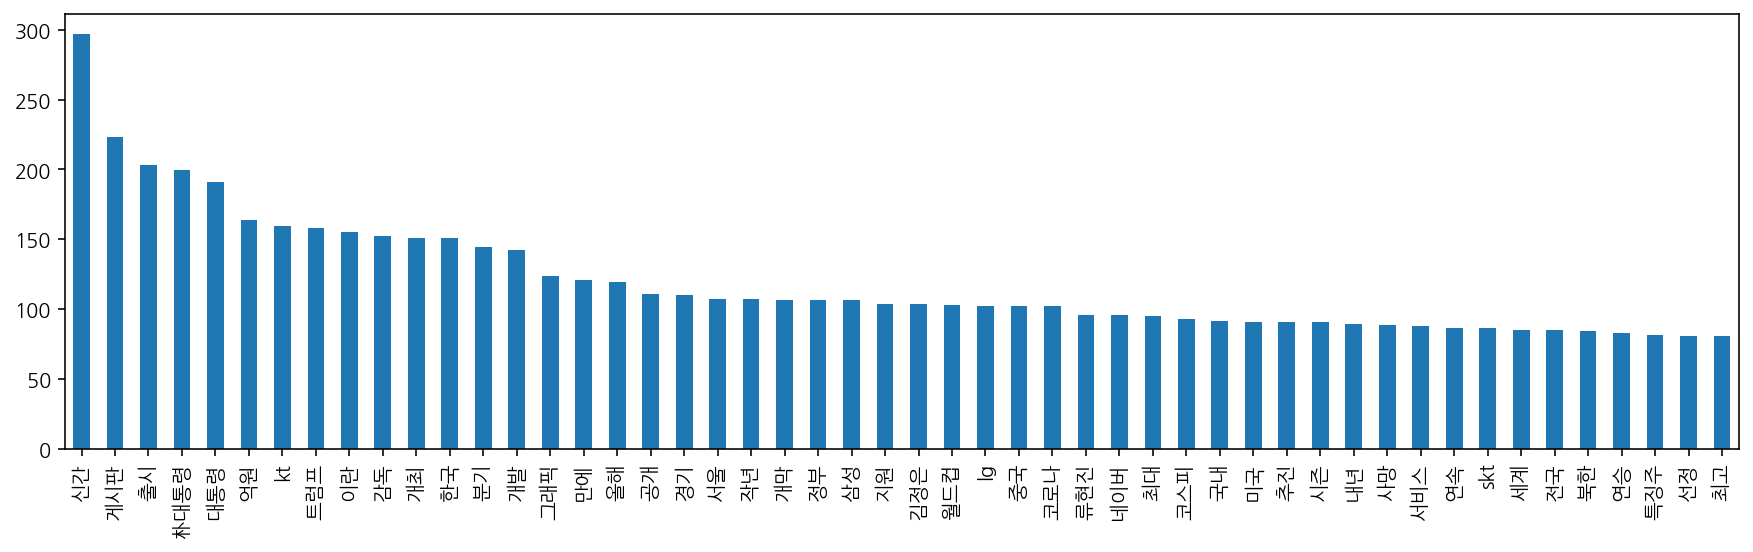

In [48]:
vocab_count.T[0].sort_values(ascending = False).head(50).plot.bar(figsize = (15, 4))

학습과 예측하기

In [49]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators : 결정트리 개수
# n_jobs : CPU 코어 사용 개수 지정(-1로 지정하면 사용할 수 있는 모든 CPU 코어를 사용한다.)
# max_depth : 트리의 최대 깊이
# max_features : 피처의 개수 또는 비율
# min_samples_split : 노드를 분할하기 위한 최소 샘플 데이터 수
# min_samples_leaf : 리프노드가 되기 위해 필요한 최소 샘플 데이터 수
# max_leaf_nodes : 리프노드의 최대 개수
model = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)
model

RandomForestClassifier(n_jobs=-1, random_state=42)

In [50]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, train_feature_tfidf, y_train, cv = 3, n_jobs = -1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.2s finished


In [73]:
y_pred # 예측한 기사의 카테고리

array([2., 1., 4., ..., 2., 2., 2.])

In [51]:
valid_accuracy = (y_pred == y_train).mean()
valid_accuracy

0.7384676041529767

In [52]:
df_accuracy = pd.DataFrame({"pred" : y_pred, "train" : y_train})
df_accuracy["accuracy"] = (y_pred == y_train)

In [53]:
df_accuracy

,pred,train,accuracy
0,2.0,4.0,False
1,1.0,4.0,False
2,4.0,4.0,True
3,3.0,4.0,False
4,4.0,4.0,True
...,...,...,...
45649,4.0,1.0,False
45650,2.0,2.0,True
45651,2.0,1.0,False
45652,2.0,2.0,True


현재 정확도가 높지는 않지만 다음의 방법을 고려해 예측 비율을 높일 수 있다.
* 전처리에서 불용어 리스트 추가
* BOW, TF-IDF의 파라미터 변경
* 분류기의 파라미터 변경
* 분류기 변경

학습

In [54]:
%time model.fit(train_feature_tfidf, y_train)

Wall time: 18.5 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [55]:
y_predict = model.predict(test_feature_tfidf)
y_predict[:5]

array([2., 3., 2., 2., 3.])

In [56]:
submit = pd.read_csv("E:/Kaggle/Data/klue/sample_submission.csv")
submit.head()

,index,topic_idx
0,45654,0
1,45655,0
2,45656,0
3,45657,0
4,45658,0


In [57]:
submit["topic_idx"] = y_predict

In [59]:
import os 

base_path = "E:/Kaggle/Data/klue"
file_name = os.path.join(base_path, f"submit_{valid_accuracy}.csv")
submit.to_csv(file_name, index = False)

In [62]:
file_name

'E:/Kaggle/Data/klue\\submit_0.7384676041529767.csv'